# Applied ML

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plot_helpers

# Statistical test library
import scipy.stats as stats

%matplotlib inline

# Data pre-processing

In [2]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [3]:
original.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
from pandas.tools.plotting import scatter_matrix

#scatter_matrix(original, figsize=(30, 30), diagonal='histogram')

In [5]:
# First glimpse at data content
original.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [6]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [7]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [8]:
# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

def binary_class(x):
    return round(x*2)/2

In [9]:
rater = referees_df.copy()
#rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'] = binary_class(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

In [10]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

Get rid of unusable columns

In [11]:
# rater.columns[:16] | rater.columns[20:] - ['Alpha_3']

In [12]:
rater.columns


Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'rater_mean'],
      dtype='object')

In [13]:
features = rater

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

#TODO: add referee columns
features = features.reset_index(drop=True)
# features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rater_mean
0,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
2,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.0
3,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
4,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0


In [14]:
features.shape

(117579, 29)

Convert string values to floats by LabelEncoder to make them readable by the classifier

In [15]:
features['refNum'].unique().shape

(1261,)

In [16]:
original_features = features.copy()

In [17]:
# Split birthday into year...
# features_t = features[features['birthday'].str.split('-')]
# features_t

In [18]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [19]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position','club']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

Leaguecountry (4 categories):
Germany    36197
England    33738
Spain      29579
France     18065
Name: leagueCountry, dtype: int64

Position (13 categories):
Center Back             19531
Center Forward          15629
Defensive Midfielder    13307
Goalkeeper              10317
Attacking Midfielder    10126
Left Fullback            8465
Right Fullback           8022
Missing                  7933
Left Midfielder          5951
Right Winger             4878
Name: position, dtype: int64

Club (96 categories):
FC Barcelona           2681
Paris Saint-Germain    2668
Manchester City        2618
Bayern München         2609
VfL Wolfsburg          2574
Arsenal FC             2547
Fulham FC              2543
Tottenham Hotspur      2495
Real Madrid            2475
VfB Stuttgart          2378
Name: club, dtype: int64



In [20]:
# Our categorical_features now looks like this:
categorical_features.head()

,leagueCountry,position,club
0,England,Center Back,Fulham FC
1,England,Left Fullback,Manchester City
2,England,Defensive Midfielder,Norwich City
3,England,Goalkeeper,Manchester United
4,Germany,Right Fullback,1899 Hoffenheim


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

,leagueCountry,position,club
0,0,1,34
1,0,6,48
2,0,4,54
3,0,5,49
4,2,10,2


In [22]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features



,Germany,England,Spain,France,Center Back,Center Forward,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [23]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)
features_no_categorical.shape


(117579, 26)

In [24]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature combinations

In [25]:
cards = features_one_hot_encoded[['redCards', 'yellowCards', 'yellowReds']]

iat = pd.DataFrame(cards.sum(axis=1) * features_one_hot_encoded['meanIAT'], columns=['IAT_comb'])
features_one_hot_encoded.join(iat, rsuffix="IAT_comb")

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona,IAT_comb
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325185
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


In [26]:
meanIAT = features_one_hot_encoded['meanIAT']
combIAT = pd.DataFrame(cards.sum(axis=1) * meanIAT, columns=['combIAT'])

features_with_gen = features_one_hot_encoded.join(combIAT)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [27]:
grouped_features = features_with_gen.groupby(['playerShort', 'birthday', 'height', 'weight'])

# Aggregating with max gives us a logical OR on the one hot encoded features
one_hot_enc_aggfunc_mapping = {i: max for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean, 'combIAT': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

,birthday,height,weight,victories,Bayer Leverkusen,SC Bastia,Germany,yellowReds,nIAT,Stade Brest,...,Toulouse FC,Valencia CF,Atlético Madrid,Leyton Orient,Reading FC,defeats,Right Fullback,Fortuna Düsseldorf,Right Midfielder,Bristol City
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979-11-08,182.0,71.0,246,0.0,0.0,1.0,0,20193.709877,0.0,...,0.0,0.0,0.0,0.0,0.0,225,0.0,0.0,0.0,0.0
aaron-hunt,1986-09-04,183.0,73.0,141,0.0,0.0,0.0,0,26291.591837,0.0,...,0.0,0.0,0.0,0.0,0.0,122,0.0,0.0,0.0,0.0
aaron-lennon,1987-04-16,165.0,63.0,200,0.0,0.0,1.0,0,21234.861386,0.0,...,0.0,0.0,0.0,0.0,0.0,115,0.0,0.0,1.0,0.0
aaron-ramsey,1990-12-26,178.0,76.0,145,0.0,0.0,1.0,0,40568.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,67,0.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,1990-03-17,180.0,73.0,41,0.0,0.0,0.0,4,2832.351351,0.0,...,0.0,0.0,0.0,0.0,0.0,43,0.0,0.0,0.0,0.0


Prepared dataset for further processing with ML methods

In [28]:
from sklearn import preprocessing


X_lab = aggregated_features.apply(LabelEncoder().fit_transform)

Xy = X_lab

In [29]:
X_train = Xy.drop(['rater_mean'], axis=1)
Y_train = Xy['rater_mean']
#Y_train = np.asarray(rater['rater_mean'], dtype="|S6")
X_train = X_train.tail(-3)
Y_train = Y_train[3:]
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print('FEATURES')
print(X_train.head(10))
print('LABELS')
print(Y_train)

<class 'pandas.core.series.Series'>
(1560, 129)
(1560,)
FEATURES
                        birthday  height  weight  victories  Bayer Leverkusen  \
playerShort                                                                     
aaron-ramsey                1138      17      21        145                 0   
abdelhamid-el-kaoutari      1074      19      18         41                 0   
abdou-traore_2               861      19      19         41                 0   
abdoulaye-diallo_2          1239      28      25          8                 0   
abdoulaye-keita_2           1118      27      28          0                 0   
abdoulwhaid-sissoko         1075      19      13         34                 0   
abdul-rahman-baba           1357      18      15         17                 0   
abdul-razak                 1275      19      23         15                 0   
abel-aguilar                 533      24      23         90                 0   
abelaziz-barrada            1007      24    

## Normalizing

In [30]:

X_train = preprocessing.normalize(X_train, norm='l2')
X_train

array([[ 0.43433795,  0.00648835,  0.00801502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93942296,  0.01661921,  0.01574452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83896254,  0.01851369,  0.01851369, ...,  0.        ,
         0.0009744 ,  0.        ],
       ..., 
       [ 0.04484538,  0.01095062,  0.01095062, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22931188,  0.01212221,  0.01464768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33863818,  0.01207697,  0.01111081, ...,  0.        ,
         0.        ,  0.        ]])

## Machine Learning by RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(verbose=1, min_samples_split=2, oob_score=True)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)


### Test classifier

In [33]:
# import test data set to test classifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [34]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [35]:
# test prediction
X_pred = [[3, 5, 4, 2], [5, 4, 3, 2]]
rfc.predict(X_pred)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1])

### Use classifier with live data

In [36]:
# Plug of unplug live data
X = X_train
y = Y_train

In [37]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [38]:
# manual prediction test
#X_pred = features.head(3)
#rfc.predict(X_pred)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 0 (0.055803)
2. feature 45 (0.051177)
3. feature 63 (0.048721)
4. feature 8 (0.048022)
5. feature 43 (0.047941)
6. feature 3 (0.047489)
7. feature 64 (0.042272)
8. feature 118 (0.041300)
9. feature 12 (0.040513)
10. feature 83 (0.038545)
11. feature 1 (0.038079)
12. feature 2 (0.037927)
13. feature 124 (0.036486)
14. feature 30 (0.032026)
15. feature 36 (0.025765)
16. feature 7 (0.021847)
17. feature 6 (0.021606)
18. feature 37 (0.020966)
19. feature 11 (0.018439)
20. feature 58 (0.017001)
21. feature 66 (0.014418)
22. feature 25 (0.014184)
23. feature 114 (0.011692)
24. feature 70 (0.010953)
25. feature 84 (0.008704)
26. feature 53 (0.008123)
27. feature 80 (0.007867)
28. feature 82 (0.007553)
29. feature 125 (0.007343)
30. feature 19 (0.006603)
31. feature 74 (0.006492)
32. feature 78 (0.005915)
33. feature 26 (0.005162)
34. feature 108 (0.004870)
35. feature 20 (0.004472)
36. feature 56 (0.004225)
37. feature 42 (0.004076)
38. feature 69 (0.004043)
39. fe

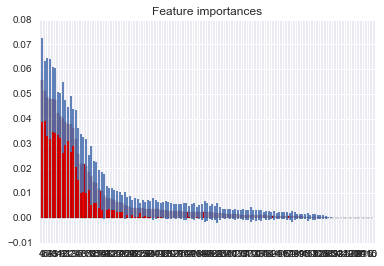

In [39]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Performance assessment through cross-validation

In [40]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=50, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few tree

[ 0.63636364  0.6969697   0.72727273  0.66666667  0.63636364  0.65625
  0.6875      0.78125     0.6875      0.71875     0.625       0.65625
  0.6875      0.6875      0.78125     0.625       0.625       0.6875
  0.65625     0.6875      0.65625     0.6875      0.65625     0.75        0.625
  0.67741935  0.77419355  0.70967742  0.67741935  0.67741935  0.6
  0.76666667  0.63333333  0.7         0.73333333  0.73333333  0.76666667
  0.73333333  0.7         0.7         0.7         0.7         0.7
  0.76666667  0.8         0.7         0.73333333  0.8         0.66666667
  0.76666667]
Achieved model score:  0.698095307918


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x12e67ff60>],
 'caps': [<matplotlib.lines.Line2D at 0x12e687e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e690e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12e68def0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12e687710>,
  <matplotlib.lines.Line2D at 0x12e687d68>]}

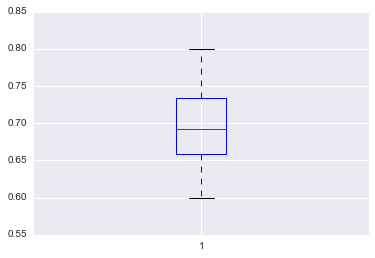

In [41]:
plt.boxplot(scores)

## TODO

- Verify if classifier should be categorical of binary
- Take into account the referee statistics in a smart way (see Slack discussion)
- Try different parameters for the random forest to compare results (bias, variance)
- Bonus
- Exercise 2


## Exercise 2


For the aggregation the referee information grouping by soccer player we use original features only, since it was not specified in the homework description whether or not we should use our base features alongside engineered ones.

Moreover using base features for clustering is a little easier to comprehend and explain.

### Aggregate the referee information grouping by soccer player

In [42]:
#Group by soccer player
grouped_features = original_features.groupby(['playerShort', 'birthday', 'height', 'weight'])
grouped_features.first()

#Aggregate referee information
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean}

aggregated_features = grouped_features.agg({**column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')

#Convert birthday date column to seperate year, month and day columns
aggregated_features['year']= aggregated_features['birthday'].dt.year
aggregated_features['month']= aggregated_features['birthday'].dt.month
aggregated_features['day']= aggregated_features['birthday'].dt.day
aggregated_features = aggregated_features.drop(['birthday'], axis=1)
aggregated_features.head()

,height,weight,victories,meanIAT,yellowCards,redCards,yellowReds,ties,nIAT,goals,games,meanExp,nExp,rater_mean,defeats,year,month,day
playerShort,,,,,,,,,,,,,,,,,,
aaron-hughes,182.0,71.0,246,0.344413,19,0,0,179,20193.709877,9,650,0.489007,21143.635802,0.0,225,1979,11,8
aaron-hunt,183.0,73.0,141,0.348943,42,1,0,72,26291.591837,62,335,0.450376,27057.214286,0.0,122,1986,9,4
aaron-lennon,165.0,63.0,200,0.345893,11,0,0,97,21234.861386,31,412,0.491482,22238.742574,0.0,115,1987,4,16
aaron-ramsey,178.0,76.0,145,0.346790,31,1,0,42,40568.571429,39,254,0.511650,42088.153061,0.0,67,1990,12,26
abdelhamid-el-kaoutari,180.0,73.0,41,0.331600,8,2,4,40,2832.351351,1,124,0.335587,2953.837838,0.0,43,1990,3,17


Since we want to have only two disjoint clusters lets use kMeans

In [43]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Y_true = aggregated_features['rater_mean'].round().as_matrix() #We want binary classification / two distinct clusters
X = aggregated_features.drop(['rater_mean'], axis=1)
X = X.apply(LabelEncoder().fit_transform)
X_scaled = preprocessing.scale(X, axis=1)
X_copy = X.copy()

kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
Y_pred = kmeans.labels_

For binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

Our baseline KMeans clustering with 2 clusters and all features:

Confusion matrix, without normalization
[[530 803]
 [ 73 157]]


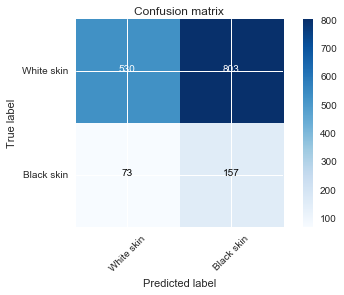

Silhouette score:  0.522060213405
Accuracy:  0.439539347409
F1 score:  0.263865546218


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

conf_mat = confusion_matrix(Y_true, Y_pred)
silhouette = silhouette_score(X_scaled, Y_pred)

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Silhouette score: ", silhouette)
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Let's try to drop features in order which seems to be the most resonable - where we believe two disjoint clusters are easy to find. 

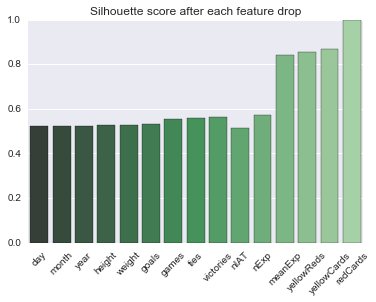

Confusion matrix, without normalization
[[1277   56]
 [ 201   29]]


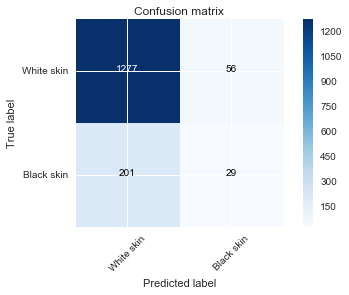

Accuracy:  0.835572616763
F1 score:  0.184126984127


In [45]:
X = X_copy
#Drop all features below = leave 'defeats' feature
to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games', 'ties', 'victories', 'nIAT', 'nExp', 'meanExp', 'yellowReds', 'yellowCards', 'redCards']
silhouettes = []
for drop_column in to_drop:
    
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)

    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=to_drop, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

As we can see creating two distinct clusters with high silhouette it is not a problem if distincitve feature is selected and quite suprisingly it achieves high accuracy. However this is simply due to the fact that majority of the players are white. Moreover it is worth noting that F1 measure/score is very low which means that although two distinct clusters where achieved, they are not race based (whites and blacks are mixed in both clusters, not blacks in one and whites in other). 

In order to check if two distinct clusters for which players with dark and light skin colors belong to different clusters can be achieved, we brute forceed calculations to find what is the best feature dropping order for which Silhouette score and F1 score is highest:
```
n_iters = 100
best_silhouette = 0.0
best_f1 = 0.0
best_drop_order = []
to_drop_list = []
Y_pred_best
for i in range(n_iters):
 
    to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'redCards','defeats', 'victories',]
    np.random.shuffle(to_drop)
    to_drop = to_drop[:-1]
    X = X_copy
    
    print("Iteration: ", i)
    to_drop_list.append(to_drop)

    for drop_column in to_drop:
        X = X.drop([drop_column], axis=1)
        X_scaled =  preprocessing.scale(X, axis=1)
        kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
        Y_pred = kmeans.labels_

        conf_mat = confusion_matrix(Y_true, Y_pred)
        accuracy = (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0])
        silhouette = silhouette_score(X_scaled, Y_pred)
        f1 = f1_score(Y_true, Y_pred)

        
        if ((silhouette > best_silhouette) and (f1 > best_f1)):
            best_silhouette = silhouette
            best_drop_order = to_drop
            best_f1 = f1
            
            print("Silhouette score: ", silhouette)
            print("Accuracy: ", accuracy)
            print("f1: ", f1)

```
in order to find out that:

In [46]:
best_drop_order = ['victories',
 'goals',
 'defeats',
 'redCards',
 'day',
 'month',
 'meanExp',
 'year',
 'yellowCards',
 'ties',
 'yellowReds',
 'height',
 'nExp',
 'nIAT',
 'weight']

Which means only one feature is left out:

In [47]:
to_drop = ['day', 'month','height', 'weight', 'goals','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'defeats', 'year', 'games', 'victories', 'redCards']
left_feature = list(set(to_drop) - set(best_drop_order))
left_feature

['games']

Let's re-cluster for this best drop order and print some metrics.

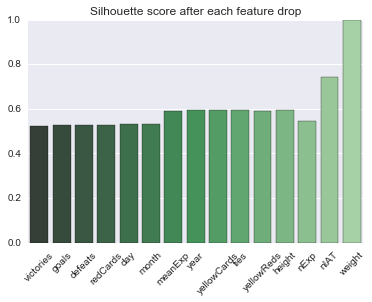

Confusion matrix, without normalization
[[1194  139]
 [ 171   59]]


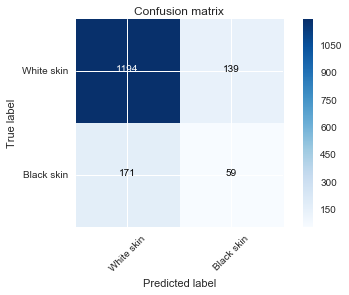

Accuracy:  0.80166346769
F1 score:  0.275700934579


In [48]:
X = X_copy
silhouettes = []
for drop_column in best_drop_order:
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)
    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=best_drop_order, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Low F1 score speaks for itself.
This result upholds our previous thoughts and assumptions - there is no way of creating two distinct clusters where players with dark and light skin colors belong to different clusters. We can easily clusterize players such that silhouette score is high but this result is not skin color dependent. 

Ufff...! We are glad that when it comes to sports racism is not a thing! :)